# Install and Import Dependencies
> You should be able to just click run for this section

In [1]:
pip install pydeck_earthengine_layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.8 MB/s eta 0:00:00
  Created wheel for pydeck_earthengine_layers: filename=pydeck_earthengine_layers-1.2.1-py2.py3-none-any.whl size=5192 sha256=5b2da218c7de0e5b95a4ec50c97ebb9ee4b96c474d4fe228aac908570b1f1be6
  Stored in directory: /root/.cache/pip/wheels/f3/61/e0/0dddd2bd717c0381cfc66ed8d82f0dd2e1562ea31b3fff3923
Successfully built pydeck_earthengine_layers


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 48.0 MB/s eta 0:00:00


In [ ]:
pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68

In [ ]:
# Import packages
import ee
import geemap
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import urllib.parse
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn
from pydeck_earthengine_layers import EarthEngineLayer
import pydeck as pdk
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import r2_score
from google.colab import drive
drive.mount('/content/drive')

# Authenticate and Initialize Google Earth Engine API

In [ ]:
# Initialize and Authenticate Earth Engine API
ee.Authenticate()
ee.Initialize()

# Adjust the slider to pick the Study Period

In [ ]:
# These widgets will be used to customize the subsequent call of functions:

# Pick the range of years for study 

year_range = widgets.IntRangeSlider(
    value=[2000, 2022],
    min=2000,
    max=2023,
    step=1,
    description='Years',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

year_range

IntRangeSlider(value=(2000, 2022), description='Years', max=2023, min=2000)

# NDSI Snow Cover Chart/Map Functions

> Includes the following functions:


# *   **studyAreaImporter(path)**
  Imports the .shp file of interest

---

# *   **snowCoverData()**
  Runs through the input range of years and reduces the studyArea's Terra MODIS Daily 'NDSI_Snow_Cover' product into median values for each date and collects it all into a single pandas DataFrame.

---

# *   **snowCoverDuration(df)**
  Takes in the snowCoverData output and reduces the data down to Snow On/Off binaries where median NDSI_Snow_Cover values >= 15 are 1 and those < 15 are 0. From this, I'm looking for dates when the binaries flip from 1 -> 0 or 0 -> 1 and seeing whether these correspond to First/Last Day of Continuous Snow Season. These values are returned as a modified pandas DataFrame found at **snowCoverDuration[0]**.
It also provides a list/array of days that corresponds to the length of each snow season, with start and stop dates (**snowCoverDuration[1:4]**, respecively)

>This needs commenting

---

# * **timeSeriesAndDurationGraphs(df)**
  This function takes in the outputs from **snowCoverDuration()** and plots a Time Series of Snow On/Off and a graph of Snow Season Duration by Year.


>This needs commenting

---

# * **snowCoverMaps()**

  This function will produce a series of Snow Cover relevant maps, including:
  

*   snowCoverDuration
*   snowCoverStd

>This needs commenting












In [ ]:
def studyAreaImporter(path):
  # Example path: "/content/drive/MyDrive/Term/Working Code/Omeed/Shapefiles/study_area/study_area.shp"

  # Convert shapefile to ee.Geometry() via geemap
  Study_Area = geemap.shp_to_ee("/content/drive/MyDrive/Term/Working Code/Omeed/Shapefiles/study_area/study_area.shp")

  # Visualize Study Area on map
  Map = geemap.Map()
  Map.addLayer(Study_Area, {}, "Study Area")
  Map.centerObject(Study_Area, zoom=8)
  ################################################### Work on later
  # Return Study Area(s)
  return Study_Area
# vvvv Relevant code for function
# path = "/content/drive/MyDrive/Term/Working Code/Omeed/Shapefiles/study_area/study_area.shp"
# studyArea = studyAreaImporter(path)




def snowCoverData():
  # This function will be used to access the NDSI_Snow_Cover band of Terra MODIS
  # and create a pandas DataFrame for each region of interest.



  # The initial and final years are stored below and are also used for the 
  # loading bar.
  
  # Loading bar widget parameters

  i_year = year_range.value[0]
  f_year = year_range.value[1]

  Reducer_Progress = widgets.IntProgress(
      value=0,
      min=0,
      max=f_year-i_year,
      step=1,
      description='Loading:',
      bar_style='', # 'success', 'info', 'warning', 'danger' or ''
      orientation='horizontal')
  
  display(Reducer_Progress)

  # Reduce the data to median and variance

  # Reduce_median will be used to reduce the regions spatially into their
  # Median/Variance values. This will take some time
  # Scale, a parameter of .reduceRegion() can be adjusted to reduce time or fine tune resolution
  def Reduce_median(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(),geometry=studyArea,scale=5000,bestEffort=True).get('NDSI_Snow_Cover')
    std = img.reduceRegion(reducer=ee.Reducer.stdDev(),geometry=studyArea,scale=5000,bestEffort=True).get('NDSI_Snow_Cover')
    return img.set('date',img.date().format()).set('Mean', mean).set('StandardDeviation',std)

  # A for loop is used here to reduce the regions for every year of interest.
  # This is also a way to bypass Google Earth Engine stopping you because it is
  # too computationally heavy. The values for i_year and f_year are established 
  # via the widget in the cell above and are dynamically updated

  for i in range(i_year,f_year):

    # Access MODIS data with new date range
    MODIS = ee.ImageCollection("MODIS/006/MOD10A1").filter(ee.Filter.date((str(i)+'-08-01'), (str(i+1))+'-08-01')).filterBounds(studyArea)
    snowCover = MODIS.select('NDSI_Snow_Cover')

    # Apply Reducer
    studyAreaMedian = snowCover.map(Reduce_median)
    
    # Create/concatenate DataFrames 
    nested_list = studyAreaMedian.reduceColumns(ee.Reducer.toList(3),['date', 'Mean','StandardDeviation']).values().get(0)
    if i == i_year: # If this is the first year, create a DataFrame
      df = pd.DataFrame(nested_list.getInfo(),columns=['date', 'Mean','StandardDeviation'])
    else: # For every year that isn't the initial year, concatenate the new
          # DataFrames to the original DataFrame
      df2 = pd.DataFrame(nested_list.getInfo(),columns=['date', 'Mean','StandardDeviation'])
      df=pd.concat([df,df2],ignore_index=True)

    # Add to the loading bar
    Reducer_Progress.value+=1
  
  df['date'] = pd.to_datetime(df['date'])

  return df




def snowCoverDuration(snowData):
    # This function will take in the acquired snowCoverData and analyze it for 
    # snowCoverDuration, as well as return snowCoverstart/end.

    ''' Create a new column in the dataframe that indicates whether the snow
     cover is present or not by comparing the median snow 
     cover values with a threshold value. We will define a threshold
     of 15 (in units of NDSI snow cover) '''
    snowData['Rolling_mean'] = snowData['Mean'].rolling(window=7, center=True,min_periods=1).median()
    snowData['snow_present'] = snowData['Rolling_mean'] > 40
    snowData['snow_change'] = snowData['snow_present'].diff()
    snowData['snow_change'][0] = False
    snowData['snow_season'] = 0
    snowData.loc[snowData['snow_present'] != 1, 'snow_present'] = 0
    snowStart = []
    snowStartDates = []
    snowStopDates = []
    snowStop = []
    snowDuration = []
    availableSnowStart = True
    availableSnowStop = True
    
    for i in range(len(snowData['snow_change'])):
      try: 
        if snowData['snow_change'][i]:
          if snowData['snow_present'][i:i+21].sum() >= 20:
            snowData['snow_season'][i] = 1
            snowStart.append(snowData['date'].dt.date[i])
            snowStartDates.append(snowData['date'].dt.date[i])
            snowStartReady = True
          elif snowData['snow_present'][i:i+15].sum() <= 0 and snowStartReady:
            snowData['snow_season'][i] = -1
            snowDuration.append(((snowData['date'].dt.date[i]-snowStart[0])).days)
            snowStopDates.append(snowData['date'].dt.date[i])
            snowStart = []
            snowStartReady = False
          else:
              continue
      except Exception as e:
        print(e)
    return [snowData, snowDuration, snowStartDates, snowStopDates]



def timeSeriesAndDurationGraphs(snowDurationDF):

  fig, ax = plt.subplots(figsize=(15,7))
  seaborn.lineplot(data=snowDurationDF[0], x='date', y='snow_present', ax=ax)
  ax.set_ylabel('Snow On/Off',fontsize=20)
  ax.set_xlabel('date', fontsize=20)
  ax.set_title('Snow On/Off')
  fig.show()

  import plotly.express as px
  df = pd.DataFrame(snowDurationDF[1], columns=['Snow Season Duration (Days)'])
  df['Year of Snow Season Start'] = range(year_range.value[0],year_range.value[1],1)
  df['Snow Season Start Date'] = snowDurationDF[2]
  df['Snow Season Stop Date'] = snowDurationDF[3]
  snowSeasonDurationByYear = px.scatter(df, x="Year of Snow Season Start", y="Snow Season Duration (Days)", trendline="ols",title="Snow Season Duration by Year",hover_data=df,marginal_y='histogram',template='ggplot2')
  snowSeasonDurationByYear.show()
  return



def snowCoverMaps():

  MODIS = ee.ImageCollection("MODIS/006/MOD10A1").filter(ee.Filter.date((str(year_range.value[0])+'-07-01'), (str(year_range.value[1]))+'-07-01')).filterBounds(studyArea)
  snowCover = MODIS.select('NDSI_Snow_Cover')
  snowCoverVis = {
    'min': 0.0,
    'max': 100.0,
    'palette': ['black', '0dffff', '0524ff', 'ffffff'],
  }

  def snowOnOffMask(img):
    return img.gt(15)


  snowCoverClipped = snowCover.map(lambda image: image.clip(studyArea))
  snowOn = snowCoverClipped.map(snowOnOffMask)
  snowOnDuration = snowOn.sum()
  snowCoverStd = snowCoverClipped.reduce(ee.Reducer.stdDev())
  Map = geemap.Map()
  Map.addLayerControl()
  snowOnDuration_params = {'min': 0, 'max': 200, 'palette': ['191970','FF00FF']}
  snowCoverStd_params = {'min': 0, 'max': 50, 'palette': ['191970','FF00FF']}
  Map.addLayer(snowOnDuration,snowOnDuration_params, 'Snow On Duration (Days)')
  Map.addLayer(snowCoverStd,snowOnDuration_params, 'Snow Cover Standard Deviation')
  Map.add_colorbar(
      snowOnDuration_params, label="Snow On Season Duration (Days)", orientation="vertical", layer_name="Snow On/Off"
  )
  Map.centerObject(studyArea)
  return Map

# Import shapefile and run 
*(Depending on range of years it will take some time)*

IntProgress(value=0, description='Loading:', max=22)

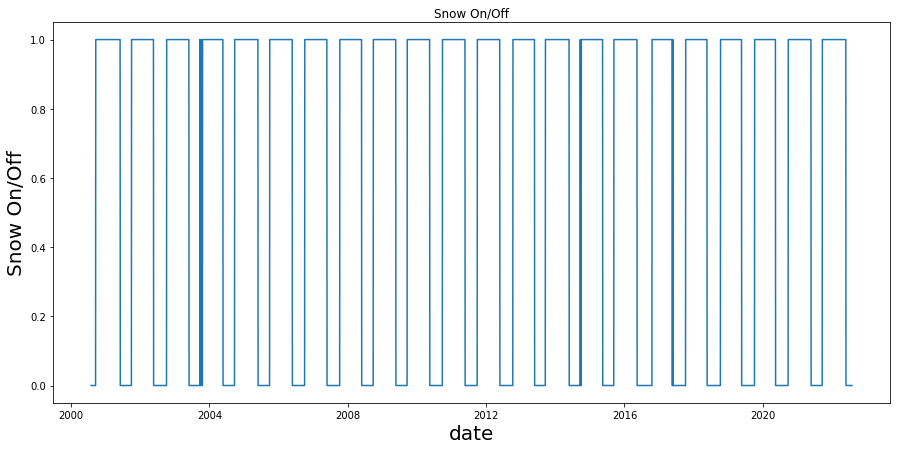

In [ ]:
# Import shapefile of interest:
path = "/content/drive/MyDrive/Term/Working Code/Omeed/Shapefiles/ANWR/study_area.shp"
studyArea = studyAreaImporter(path)

# Gather data and plot
rawSnowData = snowCoverData()
snowOnOff = snowCoverDuration(rawSnowData)
snowOnOff[0].to_csv ('/content/drive/MyDrive/Term/Working Code/Omeed/Data/AMSR/ANWR_snowCover.csv', header=True)
timeSeriesAndDurationGraphs(snowOnOff)

In [ ]:
# Produce GEE Maps:
snowCoverMaps()

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

IntProgress(value=0, description='Loading:', max=22)

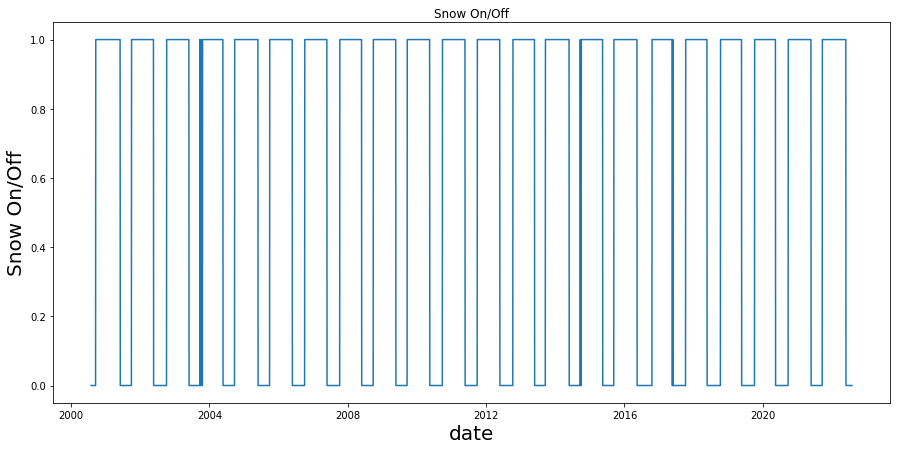

In [ ]:
# Import shapefile of interest:
path = "/content/drive/MyDrive/Term/Working Code/Omeed/Shapefiles/NPR-A/study_area.shp"
studyArea = studyAreaImporter(path)

# Gather data and plot
rawSnowData = snowCoverData()
snowOnOff = snowCoverDuration(rawSnowData)
snowOnOff[0].to_csv ('/content/drive/MyDrive/Term/Working Code/Omeed/Shapefiles/NPR-A/NPR_A_snowCover.csv', header=True)
timeSeriesAndDurationGraphs(snowOnOff)

In [ ]:
snowCoverMaps()

In [ ]:
# Produce GEE Maps:
Map = snowCoverMaps()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…


# **Everything below this is just me messing with code**
---



In [ ]:
snowOnOff = snowCoverDuration(snow)

fig, ax = plt.subplots(figsize=(15,7))

seaborn.lineplot(data=snowOnOff[0], x='date', y='snow_present', ax=ax)

ax.set_ylabel('Snow On/Off',fontsize=20)
ax.set_xlabel('date', fontsize=20)

ax.set_title('Snow On/Off')
print(snowOnOff[0].columns)

In [ ]:
import plotly.express as px
df = pd.DataFrame(snowOnOff[1], columns=['Snow Season Duration (Days)'])
df['Year of Snow Season Start'] = range(year_range.value[0],year_range.value[1],1)
df['Snow Season Start Date'] = snowOnOff[2]
df['Snow Season Stop Date'] = snowOnOff[3]

# template (str or dict or plotly.graph_objects.layout.Template instance) – The figure template name (must be a key in plotly.io.templates) or definition.

snowSeasonDurationByYear = px.scatter(df, x="Year of Snow Season Start", y="Snow Season Duration (Days)", trendline="ols",title="Snow Season Duration by Year",hover_data=df,marginal_y='histogram',template='ggplot2')
snowSeasonDurationByYear.show()

In [ ]:
fig = px.line(snowOnOff[0], x="date", y="snow_present", title='Snow On/Off')
fig.show()

In [ ]:
# Create X and Y-axis values:
x = range(year_range.value[0],year_range.value[1],1)
y = snowOnOff[1]

# Format Scatterplot
plt.scatter(x,y,alpha=1)
plt.rcParams['figure.figsize'] = [15, 7]
plt.xticks(x)
plt.ylabel('Snow Season Duration (Days)')
plt.xlabel('Year of Snow Season Start')

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)


#add trendline to plot
plt.plot(x, p(x),color="purple", linewidth=2.5, linestyle="--")
plt.show()

In [ ]:
path = "/content/drive/MyDrive/Term/Working Code/Omeed/Shapefiles/study_area/study_area.shp"
studyArea = studyAreaImporter(path)

In [ ]:
Map = geemap.Map()
Map.addLayer(studyArea,{}, "Study Area")
Map

In [ ]:
MODIS = ee.ImageCollection("MODIS/006/MOD10A1").filter(ee.Filter.date('2020-01-01', '2020-10-01')).filterBounds(studyArea)
snowCover = MODIS.select('NDSI_Snow_Cover')
snowCoverVis = {
  'min': 0.0,
  'max': 100.0,
  'palette': ['black', '0dffff', '0524ff', 'ffffff'],
}

def snowOnOffMask(img):
  return img.gt(15)
snowCoverClipped = snowCover.map(lambda image: image.clip(studyArea))
snowOn = snowCoverClipped.map(snowOnOffMask)

# Map.addLayer(snowOn, {}, "Snow On/Off")
# Map

In [ ]:
snowOnDuration = snowOn.sum()
snowCoverStd = snowCoverClipped.reduce(ee.Reducer.stdDev())
Map = geemap.Map()
Map.addLayerControl()
snowOnDuration_params = {'min': 0, 'max': 200, 'palette': ['191970','FF00FF']}
snowCoverStd_params = {'min': 0, 'max': 50, 'palette': ['191970','FF00FF']}
Map.addLayer(snowOnDuration,snowOnDuration_params, 'Snow On Duration (Days)')
Map.addLayer(snowCoverStd,snowOnDuration_params, 'Snow Cover Standard Deviation')
Map.add_colorbar(
    snowOnDuration_params, label="Snow On Season Duration (Days)", orientation="vertical", layer_name="Snow On/Off"
)
Map.centerObject(studyArea)
Map

In [ ]:
# Map = geemap.Map()
# Map.addLayerControl()
# snowCoverStd_params = {'min': 0, 'max': 100, 'palette': ['0000FF','7fffd4']}
# Map.addLayer(snowCoverStd,snowCoverStd_params, 'Snow Cover Standard Deviation')
# Map.add_colorbar(
#     snowCoverStd_params, label="Snow Cover Standard Deviation", orientation="vertical", layer_name="Snow On/Off"
# )


ee_layer = EarthEngineLayer(snowCover, snowCoverVis)

view_state = pdk.ViewState(latitude=70, longitude=-128.4194155, zoom=, bearing=0, pitch=45)
r = pdk.Deck(
    layers=[ee_layer], 
    initial_view_state=view_state
)
r = pdk.Deck(layers=[ee_layer], initial_view_state=view_state)
r.to_html('snowCoverDuration_Example.html')

In [ ]:
UK_ACCIDENTS_DATA = ('https://raw.githubusercontent.com/uber-common/'
                     'deck.gl-data/master/examples/3d-heatmap/heatmap-data.csv')
 # Define a layer to display on a map
layer = pdk.Layer(
     'HexagonLayer',
     UK_ACCIDENTS_DATA,
     get_position=['lng', 'lat'],
     auto_highlight=True,
     elevation_scale=50,
     pickable=True,
     elevation_range=[0, 3000],
     extruded=True,
     coverage=1)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=-1.415,
    latitude=52.2323,
    zoom=6,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

# Combined all of it and render a viewport
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('hexagon-example.html')

In [ ]:
address = 'Toronto, Canada'
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) + '?format=json'
response = requests.get(url).json()
lat = float(response[0]["lat"])
lon = float(response[0]["lon"])

roi = ee.Geometry.Point([lon, lat]).buffer(100000)

In [ ]:
Study_Area = geemap.shp_to_ee("/content/drive/MyDrive/Term/Working Code/Omeed/Shapefiles/study_area/study_area.shp")
Map = geemap.Map()
Map.addLayer(Study_Area, {}, "Study Area")
Map

# Select MODIS Data
Additionally, filter the date to the specified time. Here we will use the most recent year available (found in https://code.earthengine.google.com/) and filter the bounds of our dataset. 

We will select the bands of interest from Landsat, specifically band "NDSI_Snow_Cover"

In [ ]:
MODIS = ee.ImageCollection("MODIS/006/MOD10A1").filter(ee.Filter.date('2018-01-01', '2020-01-01')).filterBounds(Study_Area)
snowCover = MODIS.select('NDSI_Snow_Cover')
snowCoverVis = {
  'min': 0.0,
  'max': 100.0,
  'palette': ['black', '0dffff', '0524ff', 'ffffff'],
}

# Plot NDSI

In [ ]:
from geemap.plot import df_to_ee
# Pick the range of years
year_range = widgets.IntRangeSlider(
    value=[2001, 2023],
    min=2000,
    max=2023,
    step=1,
    description='Years',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(year_range)


# For Mean/Std Deviation

In [ ]:
# Loading bar widget
i_year = year_range.value[0]
f_year = year_range.value[1]
Reducer_Progress = widgets.IntProgress(
    value=0,
    min=0,
    max=f_year-i_year,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)
display(Reducer_Progress)
# Reduce data to mean and std
def roi_mean(img):
  mean = img.reduceRegion(reducer=ee.Reducer.mean(),geometry=Study_Area,scale=10000,bestEffort=True).get('NDSI_Snow_Cover')
  std = img.reduceRegion(reducer=ee.Reducer.stdDev(),geometry=Study_Area,scale=10000,bestEffort=True).get('NDSI_Snow_Cover')
  return img.set('date',img.date().format()).set('mean', mean).set('std',std)

for i in range(i_year,f_year):
  MODIS = ee.ImageCollection("MODIS/006/MOD10A1").filter(ee.Filter.date((str(i)+'-01-01'), (str(i+1))+'-01-01')).filterBounds(Study_Area)
  snowCover = MODIS.select('NDSI_Snow_Cover')
  snowCoverVis = {
    'min': 0.0,
    'max': 100.0,
    'palette': ['black', '0dffff', '0524ff', 'ffffff'],
  }
  Study_Area_Reduced = snowCover.map(roi_mean)
  nested_list = Study_Area_Reduced.reduceColumns(ee.Reducer.toList(3),['date', 'mean','std']).values().get(0)
  if i == i_year:
    df = pd.DataFrame(nested_list.getInfo(),columns=['date','mean','std'])
  else:
    df2 = pd.DataFrame(nested_list.getInfo(),columns=['date','mean','std'])
    df=pd.concat([df,df2])
  Reducer_Progress.value+=1
  


df['date'] = pd.to_datetime(df['date'])
df_mean = df.set_index('date')

df_mean

# For Median/Variance

In [ ]:
# Loading bar widget
i_year = year_range.value[0]
f_year = year_range.value[1]
Reducer_Progress = widgets.IntProgress(
    value=0,
    min=0,
    max=f_year-i_year,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)
display(Reducer_Progress)
# Reduce data to median and variance
def roi_median(img):
  median = img.reduceRegion(reducer=ee.Reducer.median(),geometry=Study_Area,scale=10000,bestEffort=True).get('NDSI_Snow_Cover')
  variance = img.reduceRegion(reducer=ee.Reducer.variance(),geometry=Study_Area,scale=10000,bestEffort=True).get('NDSI_Snow_Cover')
  return img.set('date',img.date().format()).set('median', median).set('variance',variance)

for i in range(i_year,f_year):
  MODIS = ee.ImageCollection("MODIS/006/MOD10A1").filter(ee.Filter.date((str(i)+'-01-01'), (str(i+1))+'-01-01')).filterBounds(Study_Area)
  snowCover = MODIS.select('NDSI_Snow_Cover')
  snowCoverVis = {
    'min': 0.0,
    'max': 100.0,
    'palette': ['black', '0dffff', '0524ff', 'ffffff'],
  }
  Study_Area_Reduced = snowCover.map(roi_median)
  nested_list = Study_Area_Reduced.reduceColumns(ee.Reducer.toList(3),['date', 'median','variance']).values().get(0)
  if i == i_year:
    df = pd.DataFrame(nested_list.getInfo(),columns=['date','median','variance'])
  else:
    df2 = pd.DataFrame(nested_list.getInfo(),columns=['date','median','variance'])
    df=pd.concat([df,df2])
  Reducer_Progress.value+=1
  


df['date'] = pd.to_datetime(df['date'])
df_median = df.set_index('date')

df_median

In [ ]:
# Plot Reduced data
fig, ax = plt.subplots(figsize=(15,7))

seaborn.lineplot(data=df_mean, ax=ax)

ax.set_ylabel('Mean NDSI and Std',fontsize=20)
ax.set_xlabel('date', fontsize=20)
ax.set_title('Mean NDSI')

In [ ]:
# Plot Reduced data

fig = plt.figure(figsize=(15,7))

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes()

ax2 = ax1.twinx()

lns1 = ax1.plot(df_median['median'],color='tab:blue',label='Median NDSI')
lns2 = ax2.plot(df_median['variance'],color='orange',label='Variance')
ax1.set_ylabel('Median NDSI',fontsize=20)
ax1.set_xlabel('date',fontsize=20)
ax2.set_ylabel('Variance',fontsize=20)
ax2.set_ylim(ymax=3000)
leg = lns1 +lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)

plt.title('Median NDSI', fontsize=20)

# fig, ax = plt.subplots(figsize=(15,7))

# seaborn.lineplot(data=df_median['median'], ax=ax)

# ax2.set_ylabel('Variance')
# ax2 = ax.twinx()
# seaborn.lineplot(data=df_median['variance'],ax=ax2,color='orange')

# leg = 
# fig.legend(title='Legend', loc='upper right')
# ax.set_title('Median NDSI')

# Last Day of Snow, ANWR

In [ ]:
# Import shapefile for ANWR

path = "/content/drive/MyDrive/Term/Working Code/Omeed/Shapefiles/ANWR/study_area.shp"
studyArea = studyAreaImporter(path)

Map = geemap.Map()

In [ ]:

startDoy = 1
startYear = 2000
endYear = 2022
startDate = None

def addDateBands(img):
    # Get image date.
    date = img.date()
    # Get calendar day-of-year.
    calDoy = date.getRelative('day', 'year')
    # Get relative day-of-year; enumerate from user-defined startDoy.
    relDoy = date.difference(startDate, 'day')
    # Get the date as milliseconds from Unix epoch.
    millis = date.millis()
    # Add all of the above date info as bands to the snow fraction image.
    dateBands = ee.Image.constant([calDoy, relDoy, millis, startYear]).rename(['calDoy', 'relDoy', 'millis', 'year'])
    # Cast bands to correct data type before returning the image.
    return img.addBands(dateBands).cast({'calDoy': 'int', 'relDoy': 'int', 'millis': 'long', 'year': 'int'}).set('millis', millis)

waterMask = ee.Image('MODIS/MOD44W/MOD44W_005_2000_02_24').select('water_mask').Not()

completeCol = ee.ImageCollection('MODIS/006/MOD10A1').filterBounds(studyArea.geometry()).select('NDSI_Snow_Cover').map(lambda img : img.clip(studyArea))

# Pixels must have been 10% snow covered for at least 2 weeks in 2018.
snowCoverEphem = completeCol.filterDate('2018-01-01', '2019-01-01').map(lambda img: img.gte(15)).sum().gte(14)

# Pixels must not be 10% snow covered more than 124 days in 2018.
snowCoverConst = completeCol.filterDate('2018-01-01', '2019-01-01').map(lambda img: img.gte(15)).sum().lte(124)

analysisMask = waterMask.multiply(snowCoverEphem).multiply(snowCoverConst)

years = ee.List.sequence(startYear, endYear)

def annualList(year):
    global startYear, startDate
    # Set the global startYear variable as the year being worked on so that
    # it will be accessible to the addDateBands mapped to the collection below.
    startYear = year

    # Get the first day-of-year for this year as an ee.Date object.
    firstDoy = ee.Date.fromYMD(year, 1, 1)

    # Advance from the firstDoy to the user-defined startDay; subtract 1 since
    # firstDoy is already 1. Set the result as the global startDate variable so
    # that it is accessible to the addDateBands mapped to the collection below.
    startDate = firstDoy.advance(startDoy - 1, 'day')

    # Get endDate for this year by advancing 1 year from startDate.
    # Need to advance an extra day because end date of filterDate() function
    # is exclusive.
    endDate = startDate.advance(1, 'year').advance(1, 'day')

    # Filter the complete collection by the start and end dates just defined.
    yearCol = completeCol.filterDate(startDate, endDate)

    # Construct an image where pixels represent the first day within the date
    # range that the lowest snow fraction is observed.
    noSnowImg = yearCol \
        .map(addDateBands) \
        .sort('millis',False) \
        .reduce(ee.Reducer.min(5)) \
        .rename(['snowCover', 'calDoy', 'relDoy', 'millis', 'year']) \
        .updateMask(analysisMask) \
        .set('year',year)
    return noSnowImg.updateMask(noSnowImg.select('snowCover').eq(0))


annualCol = ee.ImageCollection.fromImages(years.map(annualList))
thisYear = 2012
palette = ['0D0887', '5B02A3', '9A179B', 'CB4678', 'EB7852', 'FBB32F', 'F0F921']
reversed_palette = palette[::-1]
visArgs = {
  'bands': ['calDoy'],
  'min': 230,
  'max': 290,
  'palette': palette}

firstDaySnowYear = annualCol.filter(ee.Filter.eq('year',thisYear)).first()
Map.addLayer(firstDaySnowYear, visArgs, 'First day of snow, '+str(thisYear));


In [ ]:

startDoy = 0
startYear = 2000
endYear = 2022
startDate = None

def addDateBands(img):
    # Get image date.
    date = img.date()
    # Get calendar day-of-year.
    calDoy = date.getRelative('day', 'year')
    # Get relative day-of-year; enumerate from user-defined startDoy.
    relDoy = date.difference(startDate, 'day')
    # Get the date as milliseconds from Unix epoch.
    millis = date.millis()
    # Add all of the above date info as bands to the snow fraction image.
    dateBands = ee.Image.constant([calDoy, relDoy, millis, startYear]).rename(['calDoy', 'relDoy', 'millis', 'year'])
    # Cast bands to correct data type before returning the image.
    return img.addBands(dateBands).cast({'calDoy': 'int', 'relDoy': 'int', 'millis': 'long', 'year': 'int'}).set('millis', millis)

waterMask = ee.Image('MODIS/MOD44W/MOD44W_005_2000_02_24').select('water_mask').Not()

completeCol = ee.ImageCollection('MODIS/006/MOD10A1').filterBounds(studyArea.geometry()).select('NDSI_Snow_Cover').map(lambda img : img.clip(studyArea))

# Pixels must have been 10% snow covered for at least 2 weeks in 2018.
snowCoverEphem = completeCol.filterDate('2018-01-01', '2019-01-01').map(lambda img: img.gte(15)).sum().gte(14)

# Pixels must not be 10% snow covered more than 124 days in 2018.
snowCoverConst = completeCol.filterDate('2018-01-01', '2019-01-01').map(lambda img: img.gte(15)).sum().lte(124)

analysisMask = waterMask.multiply(snowCoverEphem).multiply(snowCoverConst)

years = ee.List.sequence(startYear, endYear)

def annualList(year):
    global startYear, startDate
    # Set the global startYear variable as the year being worked on so that
    # it will be accessible to the addDateBands mapped to the collection below.
    startYear = year

    # Get the first day-of-year for this year as an ee.Date object.
    firstDoy = ee.Date.fromYMD(year, 1, 1)

    # Advance from the firstDoy to the user-defined startDay; subtract 1 since
    # firstDoy is already 1. Set the result as the global startDate variable so
    # that it is accessible to the addDateBands mapped to the collection below.
    startDate = firstDoy.advance(startDoy - 1, 'day')

    # Get endDate for this year by advancing 1 year from startDate.
    # Need to advance an extra day because end date of filterDate() function
    # is exclusive.
    endDate = startDate.advance(1, 'year').advance(1, 'day')

    # Filter the complete collection by the start and end dates just defined.
    yearCol = completeCol.filterDate(startDate, endDate)

    # Construct an image where pixels represent the first day within the date
    # range that the lowest snow fraction is observed.
    noSnowImg = yearCol \
        .map(addDateBands) \
        .sort('millis') \
        .reduce(ee.Reducer.min(5)) \
        .rename(['snowCover', 'calDoy', 'relDoy', 'millis', 'year']) \
        .updateMask(analysisMask) \
        .set('year',year)
    return noSnowImg.updateMask(noSnowImg.select('snowCover').eq(0))


annualCol = ee.ImageCollection.fromImages(years.map(annualList))
thisYear = 2012
palette = ['0D0887', '5B02A3', '9A179B', 'CB4678', 'EB7852', 'FBB32F', 'F0F921']
reversed_palette = palette[::-1]
visArgs = {
  'bands': ['calDoy'],
  'min': 150,
  'max': 200,
  'palette': palette}

LastDaySnowYear = annualCol.filter(ee.Filter.eq('year',thisYear)).first()
Map.addLayer(LastDaySnowYear, visArgs, 'Last day of snow, '+str(thisYear));


In [ ]:
Map.addLayerControl()
Map.center_object(studyArea.geometry());
Map